In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mp
import matplotlib.pyplot as plt
import math as m
import sympy as smp
from IPython.display import display as disp
import lablib as ll
%matplotlib inline

In [2]:
data = {}
columns = {}
experiments = []
            
data, columns, experiments = ll.read_standard_layout()

Рассчитаем рабочее давление для каждого эксперимента и отмасштабируем измерения напряжения.

In [3]:
for e in experiments:
    disp("Computing P, scaled U for %s" % e)

    ll.compute(name = "P",
               expr = lambda P_atm, P_m: P_atm + (P_m/100) * 98066.5, # Pa/at
               data = data[e],
               columns = columns[e],
               debug = True)
    
    ll.add(data[e], ll.var(name = "U_0", value = columns[e].U[0], error = columns[e].Error_U[0]))
    
    ll.compute(name = "U_scaled",
               expr = lambda U, U_0: U / U_0,
               data = data[e],
               columns = columns[e],
               debug = True)
    
    ll.compute(name = "ln_U",
               expr = lambda U_scaled: ll.log(U_scaled),
               data = data[e],
               columns = columns[e],
               debug = True)

'Computing P, scaled U for 40'

Computing variable P
Error influence estimations:


,Error,Derivative,(E*D)^2
P_m,0.500000,980.665000000000,240425.960556250
P_atm,100.000000,1,10000.0000000000


Result:


,Value,Error,ErrorRel
P,6907.822500,500.425779,7.24%


Computing row of U_scaled
Error influence estimations:


,Error,Derivative,(E*D)^2
U,None,59.8802395209581,3585.64308508731*Error_U**2
U_0,0.000100,-3585.64308508731*U,0.128568363336344*U**2


(Not displaying column 'U_scaled' of N=8 rows)
Computing row of ln_U
Error influence estimations:


,Error,Derivative,(E*D)^2
U_scaled,None,1/U_scaled,Error_U_scaled**2/U_scaled**2


(Not displaying column 'ln_U' of N=8 rows)


'Computing P, scaled U for 100'

Computing variable P
Error influence estimations:


,Error,Derivative,(E*D)^2
P_m,1.000000,980.665000000000,961703.842225000
P_atm,100.000000,1,10000.0000000000


Result:


,Value,Error,ErrorRel
P,15243.475000,985.750395,6.47%


Computing row of U_scaled
Error influence estimations:


,Error,Derivative,(E*D)^2
U,None,69.4444444444444,4822.53086419753*Error_U**2
U_0,0.000100,-4822.53086419753*U,0.232568039361378*U**2


(Not displaying column 'U_scaled' of N=11 rows)
Computing row of ln_U
Error influence estimations:


,Error,Derivative,(E*D)^2
U_scaled,None,1/U_scaled,Error_U_scaled**2/U_scaled**2


(Not displaying column 'ln_U' of N=11 rows)


'Computing P, scaled U for 200'

Computing variable P
Error influence estimations:


,Error,Derivative,(E*D)^2
P_m,0.500000,980.665000000000,240425.960556250
P_atm,100.000000,1,10000.0000000000


Result:


,Value,Error,ErrorRel
P,24559.792500,500.425779,2.04%


Computing row of U_scaled
Error influence estimations:


,Error,Derivative,(E*D)^2
U,None,147.058823529412,21626.2975778547*Error_U**2
U_0,0.000100,-21626.2975778547*U,4.67696746925923*U**2


(Not displaying column 'U_scaled' of N=12 rows)
Computing row of ln_U
Error influence estimations:


,Error,Derivative,(E*D)^2
U_scaled,None,1/U_scaled,Error_U_scaled**2/U_scaled**2


(Not displaying column 'ln_U' of N=12 rows)


'Computing P, scaled U for 300'

Computing variable P
Error influence estimations:


,Error,Derivative,(E*D)^2
P_m,0.500000,980.665000000000,240425.960556250
P_atm,100.000000,1,10000.0000000000


Result:


,Value,Error,ErrorRel
P,36327.772500,500.425779,1.38%


Computing row of U_scaled
Error influence estimations:


,Error,Derivative,(E*D)^2
U,None,0.00392156862745098,1.53787004998078e-5*Error_U**2
U_0,0.100000,-1.53787004998078e-5*U,2.36504429062788e-12*U**2


(Not displaying column 'U_scaled' of N=15 rows)
Computing row of ln_U
Error influence estimations:


,Error,Derivative,(E*D)^2
U_scaled,None,1/U_scaled,Error_U_scaled**2/U_scaled**2


(Not displaying column 'ln_U' of N=15 rows)


In [4]:
for e in experiments:
    disp("Experiment %s:" % e, data[e], columns[e])

'Experiment 40:'

,Value,Error,ErrorRel
P_atm,98600.000000,100.000000,0.10%
L_to_S,700.000000,50.000000,7.14%
V_1,0.000360,0.000000,0.14%
V_2,0.000360,0.000000,0.14%
P_m,-93.500000,0.500000,-0.53%
P,6907.822500,500.425779,7.24%
U_0,0.016700,0.000100,0.60%


,t,Error_t,ErrorRel_t,U,Error_U,ErrorRel_U,U_scaled,Error_U_scaled,ErrorRel_U_scaled,ln_U,Error_ln_U,ErrorRel_ln_U
0,0,1,inf%,0.016700,0.000100,0.60%,1.000000,0.008468,0.85%,0.000000,0.008468,35827518718116599223222458771981716349389847194...
1,22,1,4.55%,0.015000,0.000100,0.67%,0.898204,0.008049,0.90%,-0.107359,0.008961,-8.35%
2,41,1,2.44%,0.013500,0.000100,0.74%,0.808383,0.007700,0.95%,-0.212719,0.009525,-4.48%
3,49,1,2.04%,0.013000,0.000100,0.77%,0.778443,0.007588,0.97%,-0.250459,0.009748,-3.89%
4,79,1,1.27%,0.011000,0.000100,0.91%,0.658683,0.007170,1.09%,-0.417513,0.010886,-2.61%
5,96,1,1.04%,0.010000,0.000100,1.00%,0.598802,0.006979,1.17%,-0.512824,0.011656,-2.27%
6,116,1,0.86%,0.009000,0.000100,1.11%,0.538922,0.006802,1.26%,-0.618184,0.012622,-2.04%
7,137,1,0.73%,0.008000,0.000100,1.25%,0.479042,0.006640,1.39%,-0.735967,0.013860,-1.88%


'Experiment 100:'

,Value,Error,ErrorRel
P_atm,98600.000000,100.000000,0.10%
L_to_S,700.000000,50.000000,7.14%
V_1,0.000360,0.000000,0.14%
V_2,0.000360,0.000000,0.14%
P_m,-85.000000,1.000000,-1.18%
P,15243.475000,985.750395,6.47%
U_0,0.014400,0.000100,0.69%


,t,Error_t,ErrorRel_t,U,Error_U,ErrorRel_U,U_scaled,Error_U_scaled,ErrorRel_U_scaled,ln_U,Error_ln_U,ErrorRel_ln_U
0,0,1,inf%,0.014400,0.000100,0.69%,1.000000,0.009821,0.98%,0.000000,0.009821,41549969624482441768478399699981252915200477113...
1,16,1,6.25%,0.014000,0.000100,0.71%,0.972222,0.009685,1.00%,-0.028171,0.009962,-35.36%
2,47,1,2.13%,0.013000,0.000100,0.77%,0.902778,0.009356,1.04%,-0.102279,0.010363,-10.13%
3,63,1,1.59%,0.012500,0.000100,0.80%,0.868056,0.009196,1.06%,-0.141500,0.010594,-7.49%
4,78,1,1.28%,0.012000,0.000100,0.83%,0.833333,0.009040,1.08%,-0.182322,0.010848,-5.95%
5,96,1,1.04%,0.011500,0.000100,0.87%,0.798611,0.008887,1.11%,-0.224881,0.011128,-4.95%
6,114,1,0.88%,0.011000,0.000100,0.91%,0.763889,0.008739,1.14%,-0.269333,0.011440,-4.25%
7,134,1,0.75%,0.010500,0.000100,0.95%,0.729167,0.008595,1.18%,-0.315853,0.011787,-3.73%
8,154,1,0.65%,0.010000,0.000100,1.00%,0.694444,0.008455,1.22%,-0.364643,0.012175,-3.34%
9,175,1,0.57%,0.009500,0.000100,1.05%,0.659722,0.008320,1.26%,-0.415936,0.012611,-3.03%


'Experiment 200:'

,Value,Error,ErrorRel
P_atm,98600.000000,100.000000,0.10%
L_to_S,700.000000,50.000000,7.14%
V_1,0.000360,0.000000,0.14%
V_2,0.000360,0.000000,0.14%
P_m,-75.500000,0.500000,-0.66%
P,24559.792500,500.425779,2.04%
U_0,0.006800,0.000100,1.47%


,t,Error_t,ErrorRel_t,U,Error_U,ErrorRel_U,U_scaled,Error_U_scaled,ErrorRel_U_scaled,ln_U,Error_ln_U,ErrorRel_ln_U
0,0,1,inf%,0.006800,0.000100,1.47%,1.000000,0.020797,2.08%,0.000000,0.020797,87988170969492232942955551515960151429103029355...
1,24,1,4.17%,0.006600,0.000100,1.52%,0.970588,0.020494,2.11%,-0.029853,0.021115,-70.73%
2,44,1,2.27%,0.006400,0.000100,1.56%,0.941176,0.020195,2.15%,-0.060625,0.021457,-35.39%
3,62,1,1.61%,0.006200,0.000100,1.61%,0.911765,0.019901,2.18%,-0.092373,0.021827,-23.63%
4,82,1,1.22%,0.006000,0.000100,1.67%,0.882353,0.019612,2.22%,-0.125163,0.022227,-17.76%
5,103,1,0.97%,0.005800,0.000100,1.72%,0.852941,0.019329,2.27%,-0.159065,0.022661,-14.25%
6,180,1,0.56%,0.005100,0.000100,1.96%,0.750000,0.018382,2.45%,-0.287682,0.024510,-8.52%
7,208,1,0.48%,0.004900,0.000100,2.04%,0.720588,0.018126,2.52%,-0.327687,0.025155,-7.68%
8,232,1,0.43%,0.004700,0.000100,2.13%,0.691176,0.017877,2.59%,-0.369360,0.025864,-7.00%
9,259,1,0.39%,0.004500,0.000100,2.22%,0.661765,0.017634,2.66%,-0.412845,0.026648,-6.45%


'Experiment 300:'

,Value,Error,ErrorRel
P_atm,98600.000000,100.000000,0.10%
L_to_S,700.000000,50.000000,7.14%
V_1,0.000360,0.000000,0.14%
V_2,0.000360,0.000000,0.14%
P_m,-63.500000,0.500000,-0.79%
P,36327.772500,500.425779,1.38%
U_0,255.000000,0.100000,0.04%


,t,Error_t,ErrorRel_t,U,Error_U,ErrorRel_U,U_scaled,Error_U_scaled,ErrorRel_U_scaled,ln_U,Error_ln_U,ErrorRel_ln_U
0,0.000000,0.005000,inf%,255.000000,0.100000,0.04%,1.000000,0.000555,0.06%,0.000000,0.000555,23463512258531266580352387674539173371107275061...
1,32.430000,0.005000,0.02%,245.600000,0.100000,0.04%,0.963137,0.000544,0.06%,-0.037559,0.000565,-1.51%
2,64.860000,0.005000,0.01%,235.100000,0.100000,0.04%,0.921961,0.000533,0.06%,-0.081253,0.000579,-0.71%
3,97.290000,0.005000,0.01%,226.000000,0.100000,0.04%,0.886275,0.000524,0.06%,-0.120729,0.000591,-0.49%
4,129.710000,0.005000,0.00%,217.000000,0.100000,0.05%,0.850980,0.000515,0.06%,-0.161366,0.000605,-0.37%
5,162.140000,0.005000,0.00%,208.000000,0.100000,0.05%,0.815686,0.000506,0.06%,-0.203725,0.000620,-0.30%
6,194.570000,0.005000,0.00%,201.000000,0.100000,0.05%,0.788235,0.000499,0.06%,-0.237959,0.000633,-0.27%
7,227.000000,0.005000,0.00%,193.000000,0.100000,0.05%,0.756863,0.000492,0.06%,-0.278573,0.000650,-0.23%
8,259.430000,0.005000,0.00%,186.000000,0.100000,0.05%,0.729412,0.000485,0.07%,-0.315517,0.000665,-0.21%
9,291.860000,0.005000,0.00%,179.100000,0.100000,0.06%,0.702353,0.000479,0.07%,-0.353319,0.000682,-0.19%


[None, None, None, 0]

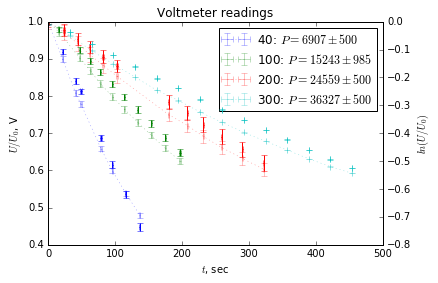

In [5]:
plt.title("Voltmeter readings")
plt.xlabel("$t$, sec")

ax1 = plt.gca()
ax1.set_ylabel("$U / U_0$, V")
ax2 = ax1.twinx()
ax2.set_ylabel("$ln(U / U_0)$")

for e in experiments:
    ax1.errorbar(x = columns[e].t,
                 y = columns[e].U_scaled,
                 xerr = columns[e].Error_t,
                 yerr = columns[e].Error_U_scaled,
                 label = "%s: $P = %d \pm %d$" % (e, data[e].Value["P"], data[e].Error["P"]),
                 alpha = 0.5,
                 linewidth = 0.5,
                 linestyle = "dotted")
    ax2.errorbar(x = columns[e].t,
                 y = columns[e].ln_U,
                 xerr = columns[e].Error_t,
                 yerr = columns[e].Error_ln_U,
                 linestyle = "none")

ax1.legend(loc = "best")
plt.axis([0, None, None, None])
ax1.axis([None, None, None, 1])
ax2.axis([None, None, None, 0])

Initial guesses for lnU:
                  Value    Error  ErrorRel
tau         185.697563 2.981299  0.016055
offset_lnU0   0.006857 0.005918  0.863135


'Final guesses for lnU:'

,Value,Error,ErrorRel
tau,185.517339,1.468974,0.79%
offset_lnU0,0.007147,0.003025,42.33%


Initial guesses for lnU:
                  Value    Error  ErrorRel
tau         414.476221 9.579931  0.023113
offset_lnU0   0.006979 0.005889  0.843833


'Final guesses for lnU:'

,Value,Error,ErrorRel
tau,414.435241,3.079643,0.74%
offset_lnU0,0.006999,0.001901,27.16%


Initial guesses for lnU:
                  Value     Error  ErrorRel
tau         623.366671 25.728297  0.041273
offset_lnU0   0.005684  0.010912  1.919745


'Final guesses for lnU:'

,Value,Error,ErrorRel
tau,623.366348,3.922186,0.63%
offset_lnU0,0.005684,0.001664,29.28%


Initial guesses for lnU:
                  Value    Error  ErrorRel
tau         854.326038 0.879023  0.001029
offset_lnU0  -0.006303 0.000291 -0.046231


'Final guesses for lnU:'

,Value,Error,ErrorRel
tau,854.326465,8.138297,0.95%
offset_lnU0,-0.006303,0.002698,-42.80%


[0, None, None, 0.1]

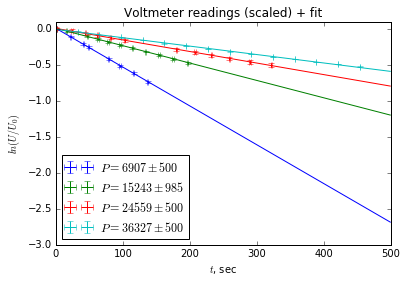

In [6]:
plt.title("Voltmeter readings (scaled) + fit")
plt.xlabel("$t$, sec")
plt.ylabel("$ln(U/U_0)$")

for e in experiments:
    plt.errorbar(x = columns[e].t,
                 y = columns[e].ln_U,
                 xerr = columns[e].Error_t,
                 yerr = columns[e].Error_ln_U,
                 linestyle = "none",
                 label = "$P = %d \pm %d$" % (data[e].Value["P"], data[e].Error["P"]))

plt.gca().set_prop_cycle(None)
t_linspace = ll.linspace([t for t in columns[e].t for e in experiments])

for e in experiments:
    model = ll.fit2(name = "lnU",
                    model = lambda t, tau, offset_lnU0: offset_lnU0 - t/tau,
                    x = columns[e].t,
                    y = columns[e].ln_U,
                    xerr = columns[e].Error_t,
                    yerr = columns[e].Error_ln_U,
                    data = data[e])

    plt.errorbar(x = t_linspace,
                 y = model(t_linspace))

plt.legend(loc = "best")
plt.axis([0, None, None, 0.1])

Initial guesses for D:
      Value    Error  ErrorRel
k 4.410460 0.368736  0.083605
l 0.000024 0.000017  0.690666


'Final guesses for D:'

,Value,Error,ErrorRel
k,4.388309,0.153688,3.50%
l,0.000025,0.000006,24.81%


'D for atmospheric pressure:'

,Value,Error,ErrorRel
D_atm,0.000070,0.000000,0.000649


<Container object of 3 artists>

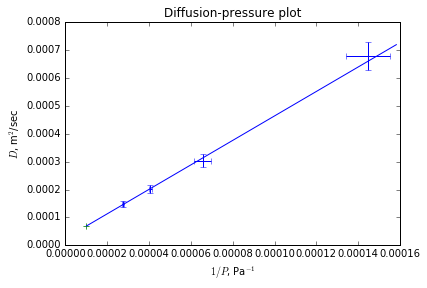

In [7]:
for e in experiments:
    ll.compute(name = "1/P",
               expr = lambda P: 1 / P,
               data = data[e],
               columns = columns[e])

    ll.compute(name = "D",
               expr = lambda V_1, V_2, L_to_S, tau: (V_1*V_2) / (V_1+V_2) * L_to_S / tau,
               data = data[e],
               columns = columns[e])

model = ll.fit2(name = "D",
                model = lambda _1_P, k, l: _1_P * k + l,
                x = [data[e].Value["1/P"] for e in experiments],
                y = [data[e].Value["D"] for e in experiments],
                xerr = [data[e].Error["1/P"] for e in experiments],
                yerr = [data[e].Error["D"] for e in experiments],
                data = data["global"])

ll.compute(name = "1/P_atm",
           expr = lambda P_atm: 1/P_atm,
           data = data["global"])

ll.compute(name = "D_atm",
           expr = lambda P_atm: model(1/P_atm),
           data = data["global"])

plt.title("Diffusion-pressure plot")
plt.xlabel("$1 / P$, Pa$^{-1}$")
plt.ylabel("$D$, m$^2$/sec")

plt.errorbar(x = [data[e].Value["1/P"] for e in experiments],
             y = [data[e].Value["D"] for e in experiments],
             xerr = [data[e].Error["1/P"] for e in experiments],
             yerr = [data[e].Error["D"] for e in experiments],
             linestyle = "none",
             ms = 2)

plt.errorbar(x = [data["global"].Value["1/P_atm"]],
             y = [data["global"].Value["D_atm"]],
             xerr = [data["global"].Error["1/P_atm"]],
             yerr = [data["global"].Error["D_atm"]],
             linestyle = "none",
             ms = 2)

plt.gca().set_prop_cycle(None)
_1_P_linspace = ll.linspace([data[e].Value["1/P"] for e in experiments] + [1 / data["global"].Value["P_atm"]])

disp("D for atmospheric pressure:", data["global"].loc[["D_atm"]])

plt.errorbar(x = _1_P_linspace,
             y = model(_1_P_linspace))